In [1]:
from tools import *
from plots import *
from RegularGrid import RegularGrid

### **Python file**

In [2]:
import random
category_name = f'formatage/{random.randint(0, 1000)}'
category_name

'formatage/455'

### **Rows**, **Columns** and more

In [3]:
folder_name =f'double_hline'
degree = 3
rows = 4
cols = 1
steps = 3
# deployment = 'min'
deployment= 'linear'

In [4]:
folder_name , path_name = \
    create_dir_hierarchy(category_name,
                         degree,
                         rows,
                         cols,
                         deployment,
                         folder_name)

In [5]:
grid = RegularGrid(degree, rows, cols)

### **Deployed** and **Undeployed**

In [6]:
undeployed_cells = [0]
deployed_cells  = [grid.numUmbrellas-2]

- grid.border()
- grid.center()
- grid.vline(line_idx)
- grid.hline(line_idx)
- grid.cross(arm_length)

---

In [7]:
# extremities
active_cells    = deployed_cells + undeployed_cells
target_percents = [100]*len(deployed_cells) + [0]*len(undeployed_cells) # 0:undeployed | 100:deployed

In [8]:
# linear
# active_cells    = grid.hline(1) + grid.hline(4)
# target_percents = linear_height_ls(grid.hline(1)) + linear_height_ls(grid.hline(4))

In [9]:
for c,p in zip(active_cells, target_percents):
    print(f'cell:target percent - {c:0>2}:{p: >3.0f}%')

cell:target percent - 06:100%
cell:target percent - 00:  0%


In [10]:
# write meta-data
with open(path_name+"/meta_data.txt", "w") as f:
    f.write("Degree: " + str(degree) + '\n')
    f.write("Rows  : " + str(rows)   + '\n')
    f.write("Cols  : " + str(cols)   + '\n')
    f.write("Deployment : " + str(deployment) + '\n')
    f.write("Steps      : " + str(steps)      + '\n')
    f.write("Active Cells    : " + str(active_cells)    + '\n')
    f.write("Target Percents : " + str(target_percents))

In [11]:
grid.generate_mesh(folder_name)

PLATE CHARACTERISTIQUES:
	plate thickness   : 0.023358
	plate edge length : 0.233578


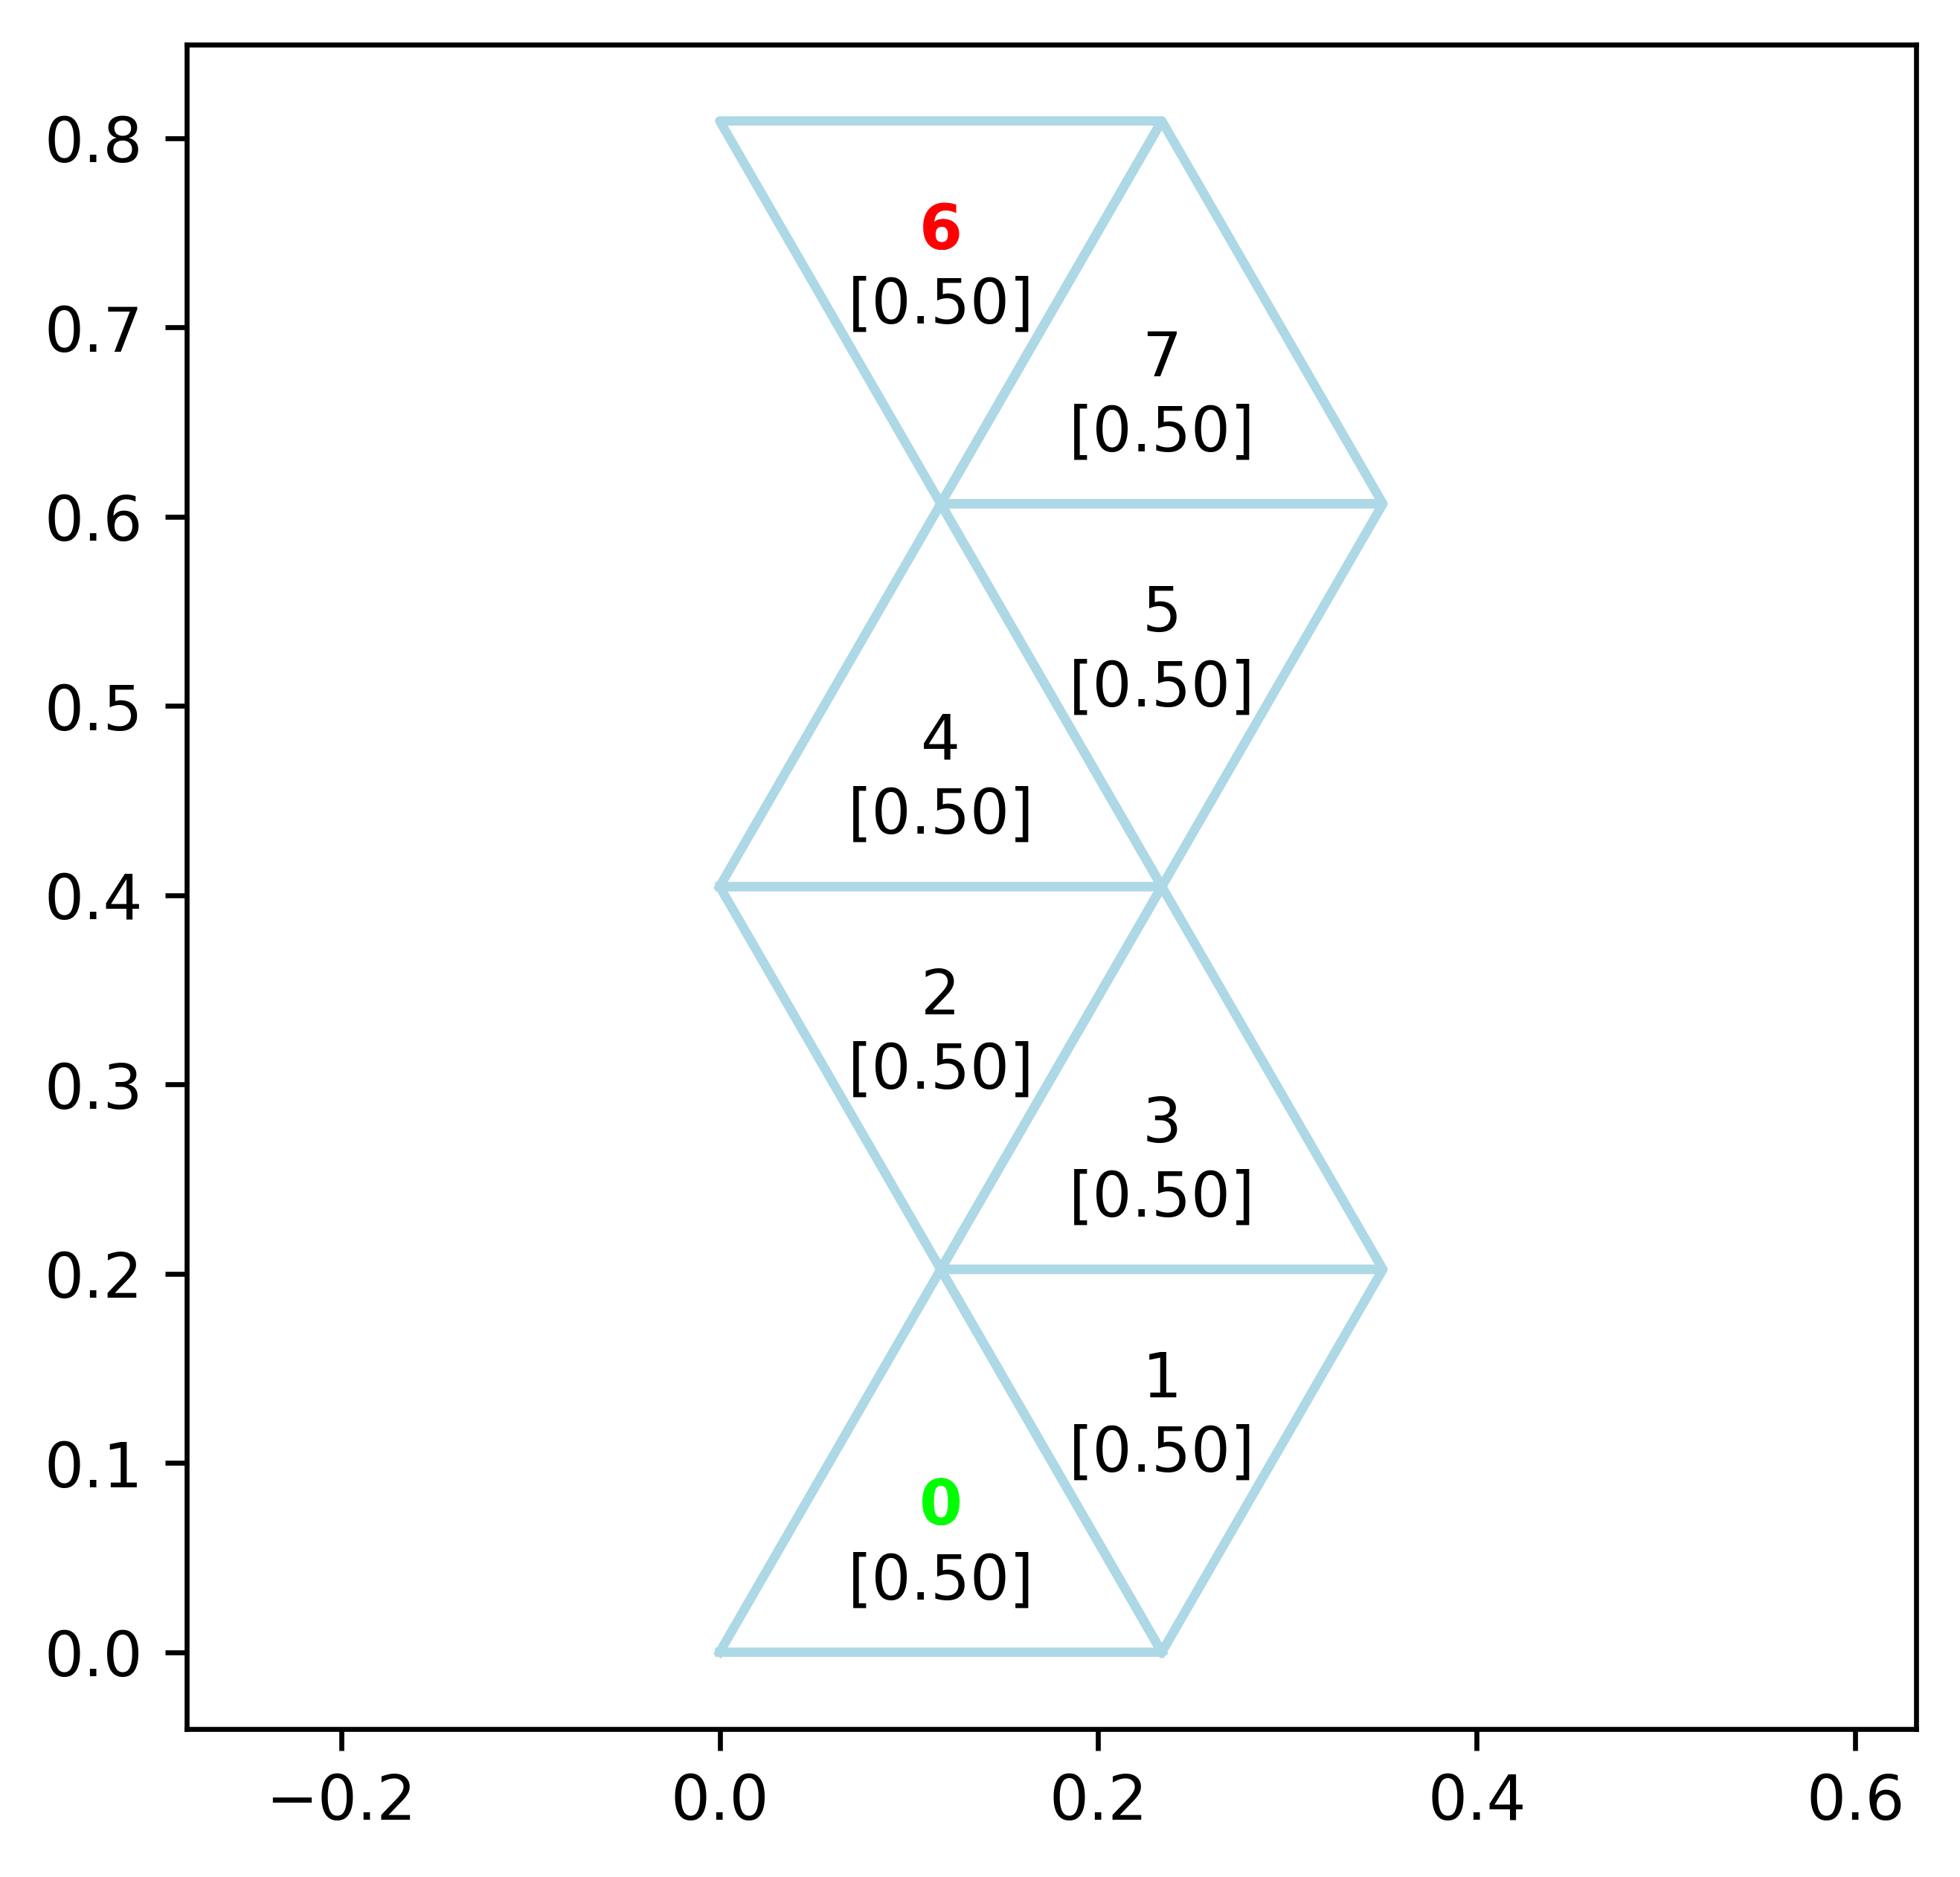

In [12]:
plot2D(grid.input_data, grid.curr_um, True, active_cells=active_cells, target_percents=target_percents, file_name = path_name+'/undeployed.png')

In [13]:
view3D = plot3D(grid.curr_um, grid.input_data)
view3D.show()

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(PointLight(color='#999999', position=(0…

In [14]:
grid.deploy(active_cells, target_percents, view3D)

success: True 

energies:
   -1.999961: Full
    0.000039: Elastic
   -2.000000: Deployment
    0.000000: Repulsion
    0.000000: Attraction
    0.000000: AngleBoundPenalty



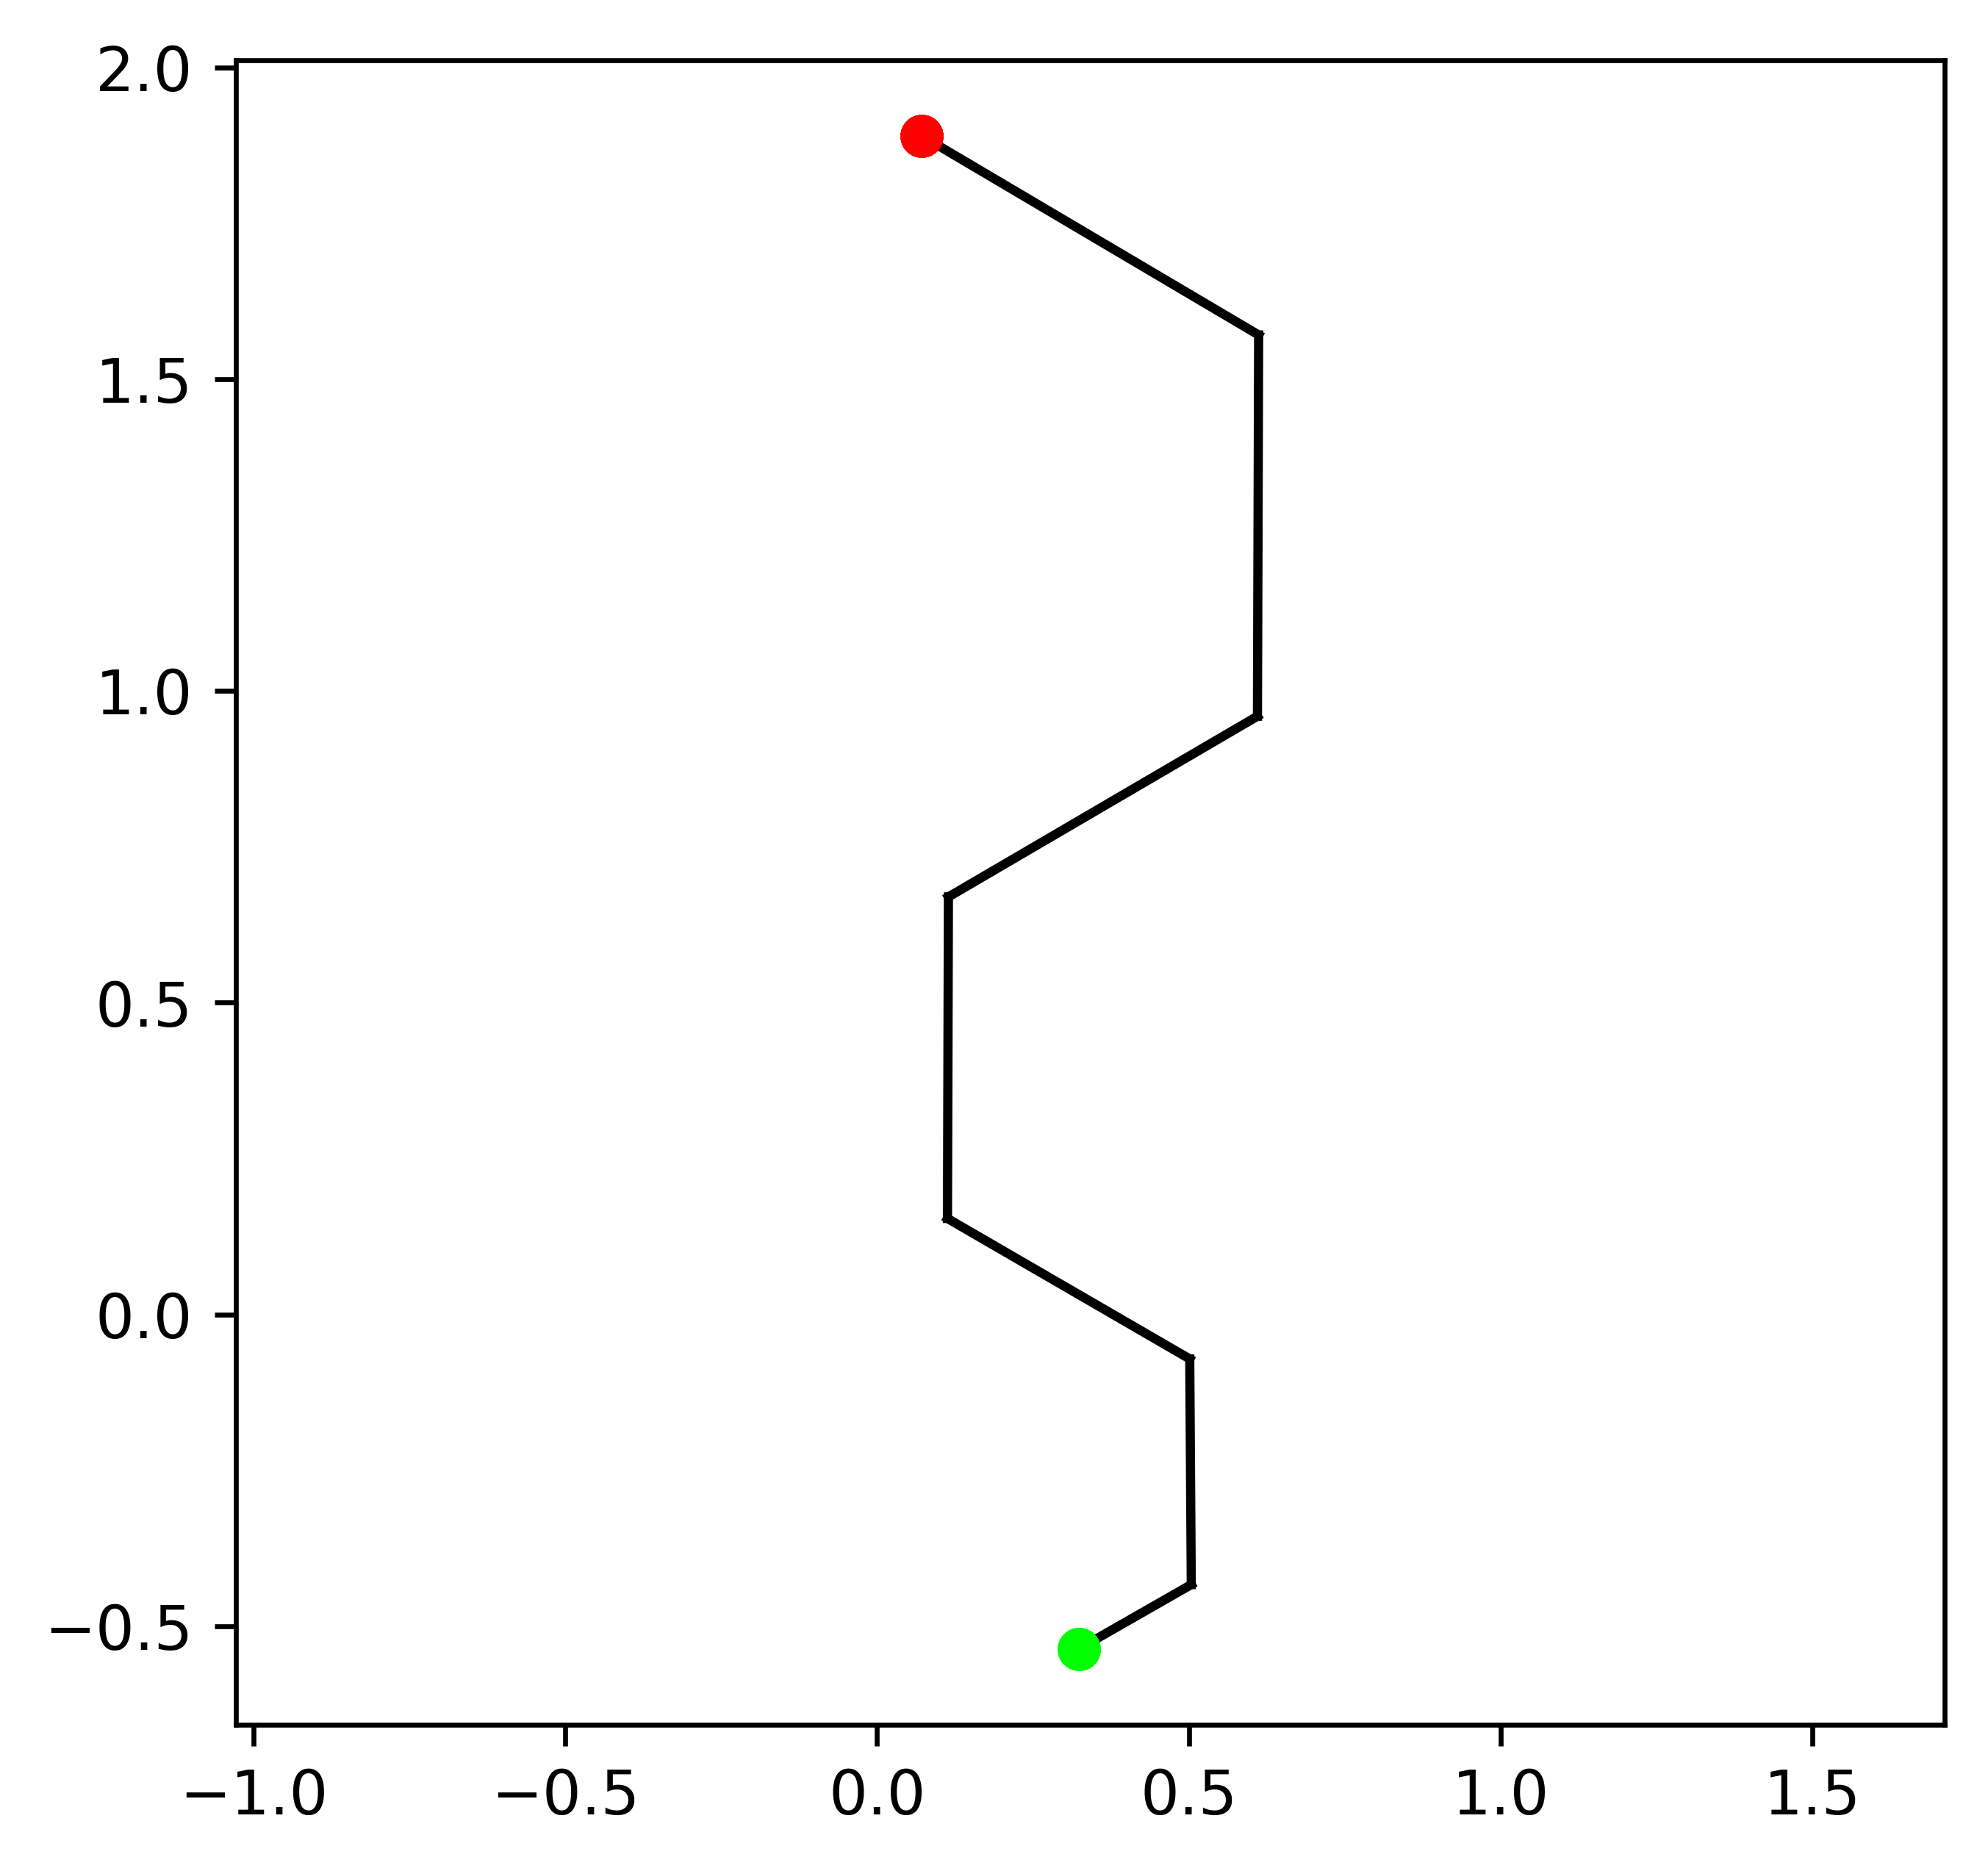

In [15]:
if grid.rows==1 or grid.cols==1:
    file_name = path_name+'/projection2D.png'
    projection2D(grid.input_data, grid.curr_um, active_cells=active_cells, target_percents=target_percents, file_name=file_name)

In [16]:
sview_vm = plot3D_stress(grid.curr_um, 'maxBending')
sview_vm.show()

maxBending Stresses Extrem values:
    max : 1.41e+01
    min : 0.00e+00


Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(PointLight(color='#999999', position=(0…

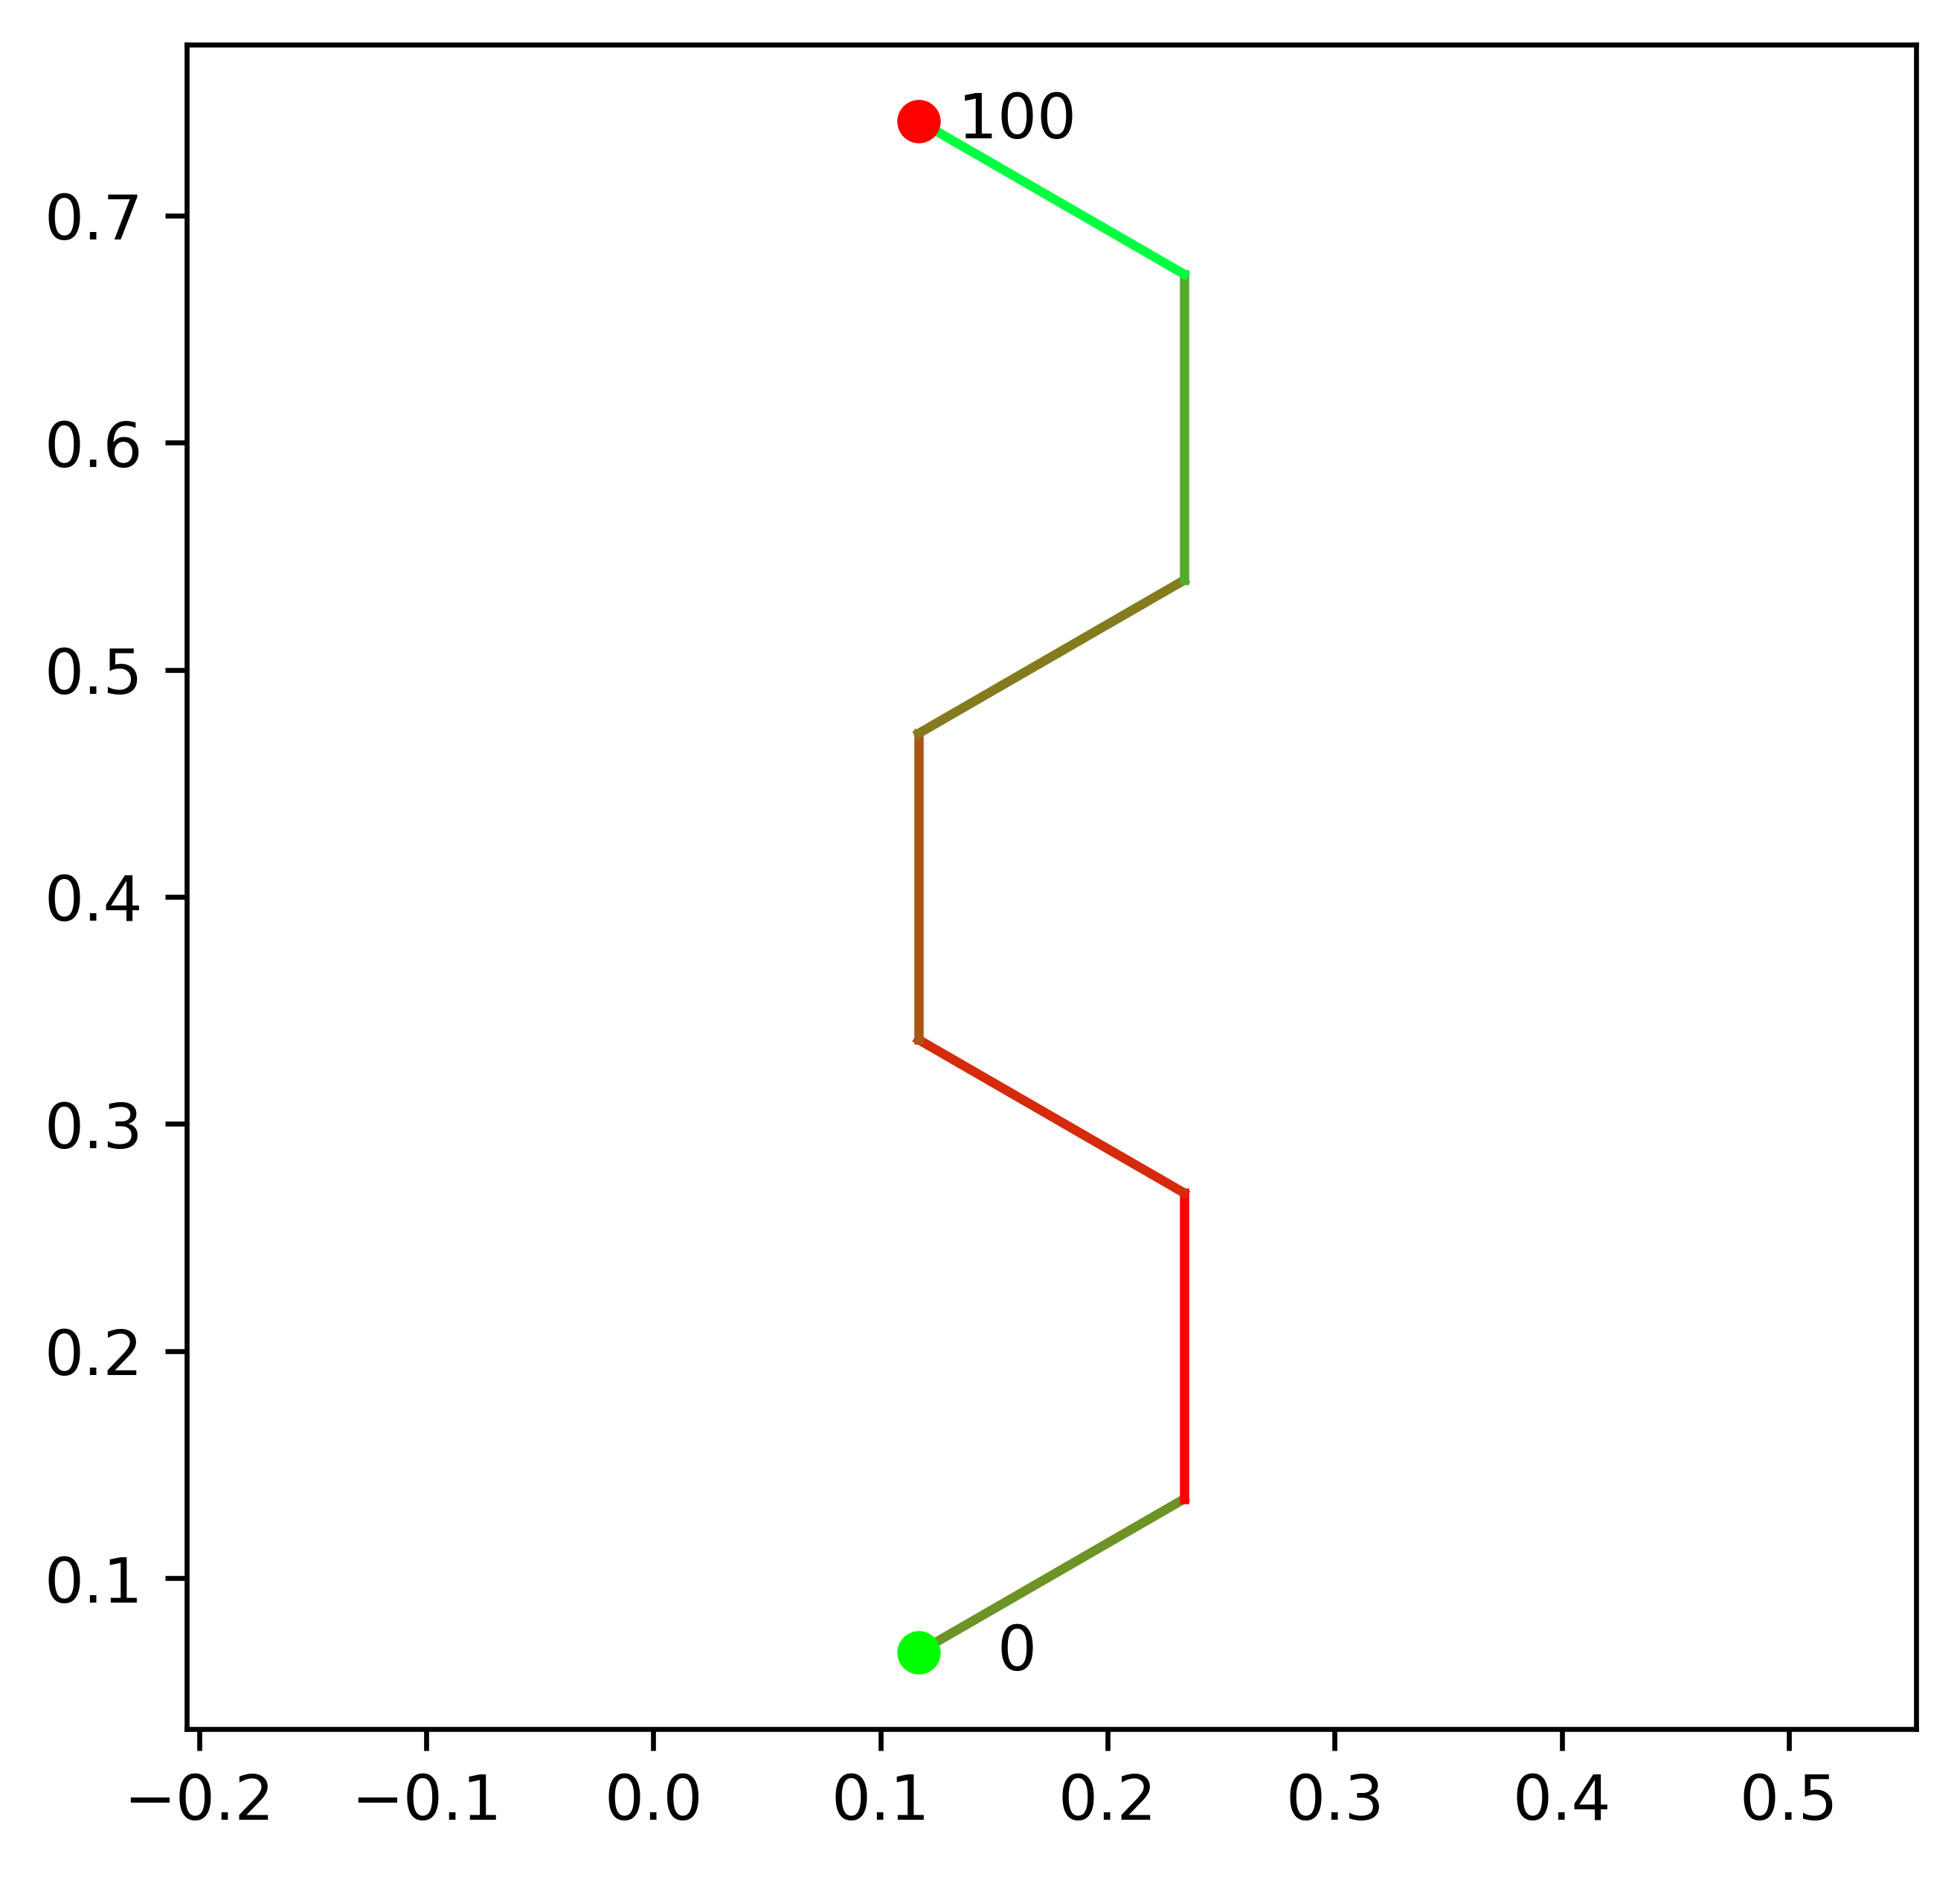

In [17]:
plot2D_stress(grid.curr_um, grid.input_data, grid.init_center_pos, active_cells, target_percents, show_percent=True)

### **Step Deployments**

In [18]:
stresses_per_steps, percents_per_steps = \
deploy_in_steps(grid.curr_um,
                grid.input_data,
                grid.init_heights,
                grid.plate_thickness,
                active_cells,
                target_percents,
                path_name,
                steps=steps,
                stress_type='maxBending',
                verbose=True,
                dep=deployment)

target %:  [0.0, 0.0]
step  0/3 saved.
target %:  [33.333333333333336, 0.0]
step  1/3 saved.
target %:  [66.66666666666667, 0.0]
step  2/3 saved.
target %:  [100.0, 0.0]
step  3/3 saved.


In [22]:
c,p,h,p0,s = read_results(path_name)

### **images**

In [ ]:
plot2D_steps(grid.input_data,
             active_cells,
             percents_per_steps,
             grid.init_center_pos,
             stresses_per_steps,
             stress_type='maxBending',
             dir_name=path_name,
             show_percent=False,
             show_plot=False)

### **GIF**

In [ ]:
fps  = 3 # frames per seconds
loop = 2 # -1: no loop | 0: infinit loop | 1: loop once (see image twice) | 2: loop twice | ...
for name in ['structure_all', 'structure_perSteps', 'structure_own', 'scatter', 'sPlot']:
    img_name_i = f'"{path_name}/jpg/*{name}*.jpg"'
    gif_name_i = f'"{path_name}/jpg/gif/{name}.gif"'
    !ffmpeg  -loglevel panic -f image2 -r $fps -pattern_type glob -i $img_name_i -loop $loop $gif_name_i
    img_name_i = f'{path_name}/png/*{name}*.png'
    gif_name_i = f'{path_name}/png/gif/{name}.gif'
    !gifski --quiet -o $gif_name_i --fps $fps --repeat $loop $img_name_i
    